# Discrete Fourier Transform: Instrument Harmonics

## What you will learn here

* Read audio files and plot their waveforms.
* Use the DFT (and it's fast implementation the FFT) to perform a spectral analysis of single notes played by real instruments.
* Analyze the partials of different instruments by visualizing their spectra.

In [1]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from IPython import display
import librosa
import librosa.display

%matplotlib inline

## Instrument 1: Flute

In [2]:
x_flute, x_flute_fs = librosa.load('../data/Tone_C4_Flute.wav')

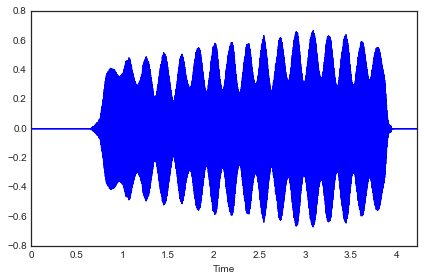

In [3]:
librosa.display.waveplot(x_flute)
plt.tight_layout()
plt.show()

In [4]:
display.Audio(data=x_flute, rate=x_flute_fs)

In [5]:
x_flute_fft = fft.fft(x_flute)

## That's what you get in theory...

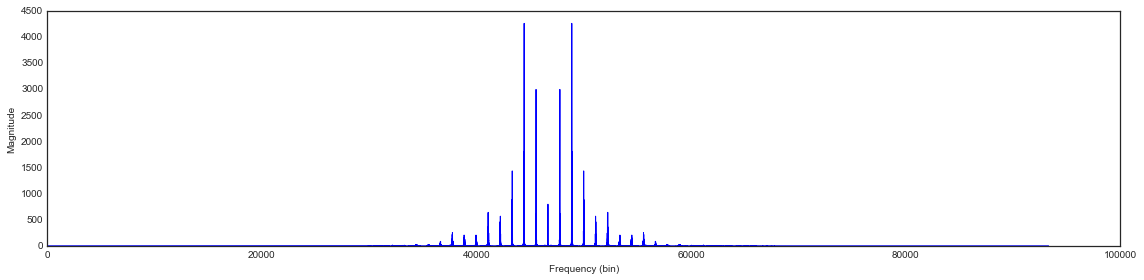

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(np.abs(np.fft.fftshift(x_flute_fft)))
plt.xlabel('Frequency (bin)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

## That's what you get in practice...

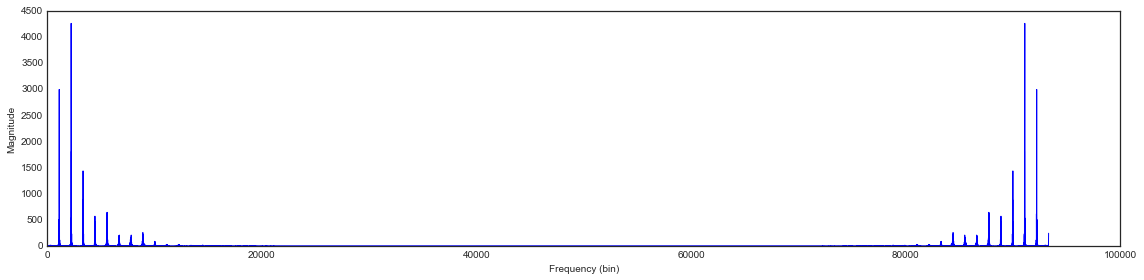

In [7]:
plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_flute_fft))
plt.xlabel('Frequency (bin)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

This way, it's easier to select the interesting part:

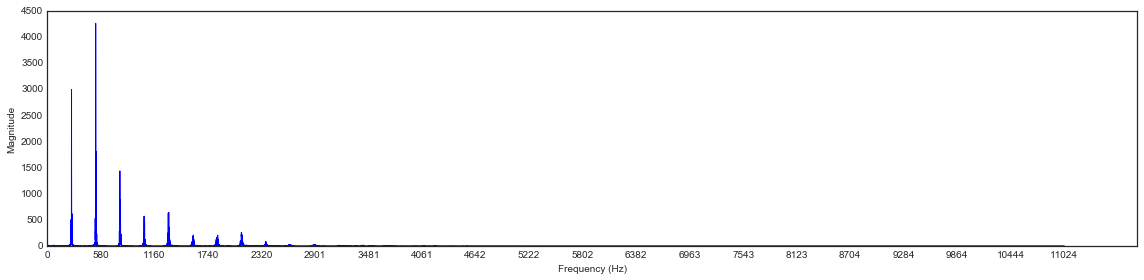

In [8]:
n_fft = x_flute_fft.shape[0]
K = int(1 + n_fft // 2)
f_coeff = np.fft.fftfreq(n_fft, d=1/x_flute_fs)
x_flute_fft_pos = x_flute_fft[:K]

plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_flute_fft_pos))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
freqs = np.linspace(0, x_flute_fs / 2, 20)
x_locs = [np.argmin(np.abs(f_coeff - cur_freq)) for cur_freq in freqs]
plt.xticks(x_locs, f_coeff[x_locs].astype(int))
plt.tight_layout()
plt.show()

Let's look at frequencies up to 2000 Hz.

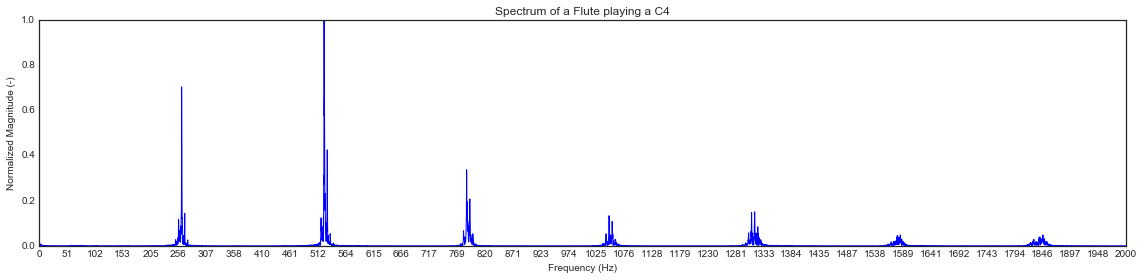

In [9]:
f_cutoff = 2000

plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_flute_fft_pos) / np.max(np.abs(x_flute_fft_pos)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude (-)')
plt.title('Spectrum of a Flute playing a C4')
freqs = np.linspace(0, f_cutoff, 40)
x_locs = [np.argmin(np.abs(f_coeff - cur_freq)) for cur_freq in freqs]
plt.xticks(x_locs, f_coeff[x_locs].astype(int))
plt.xlim(0, np.argmin(np.abs(f_coeff - f_cutoff)))
plt.tight_layout()
plt.show()

We can clearly see the tone's partials at multiples of the fundamental frequency which is around $260$ Hz. Interestingly, the second partial (1st harmonic) has more energy than the fundamental frequency.

Let's do the same plot for different instruments.

## Instrument 2: Trumpet

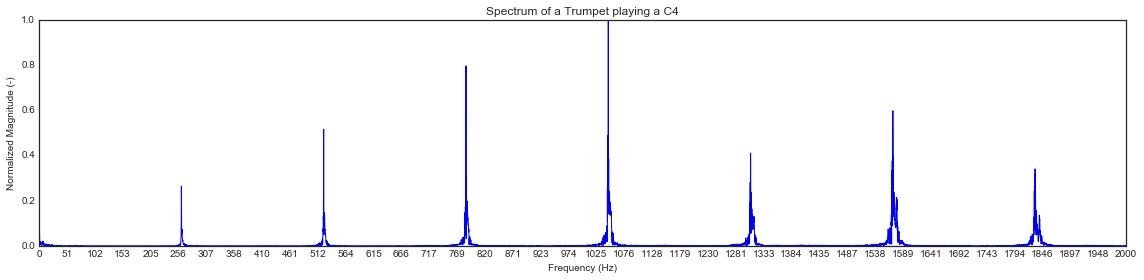

In [10]:
x_tp, x_tp_fs = librosa.load('../data/Tone_C4_Trumpet.wav')
x_tp_fft = fft.fft(x_tp)
n_fft_tp = x_tp_fft.shape[0]
K_tp = int(1 + n_fft_tp // 2)
f_coeff_tp = np.fft.fftfreq(n_fft_tp, d=1/x_tp_fs)
x_tp_fft_pos = x_tp_fft[:K_tp]

f_cutoff = 2000

plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_tp_fft_pos) / np.max(np.abs(x_tp_fft_pos)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude (-)')
plt.title('Spectrum of a Trumpet playing a C4')
freqs = np.linspace(0, f_cutoff, 40)
x_locs = [np.argmin(np.abs(f_coeff - cur_freq)) for cur_freq in freqs]
plt.xticks(x_locs, f_coeff[x_locs].astype(int))
plt.xlim(0, np.argmin(np.abs(f_coeff - f_cutoff)))
plt.tight_layout()
plt.show()

## Instrument 3: Violin

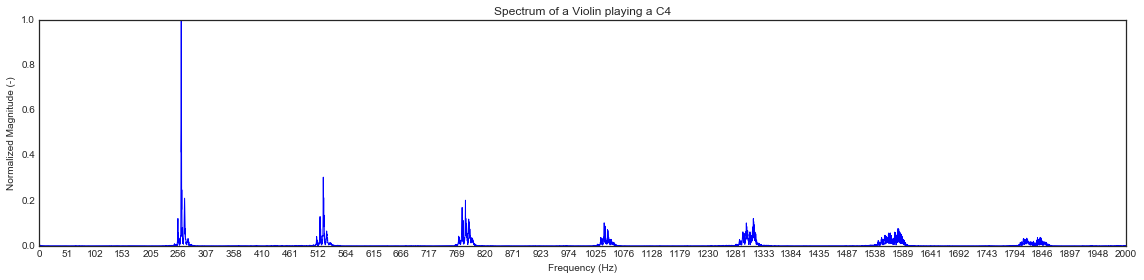

In [11]:
x_vi, x_vi_fs = librosa.load('../data/Tone_C4_Violin.wav')
x_vi_fft = fft.fft(x_vi)
n_fft_vi = x_vi_fft.shape[0]
K_vi = int(1 + n_fft_vi // 2)
f_coeff_vi = np.fft.fftfreq(n_fft_vi, d=1/x_vi_fs)
x_vi_fft_pos = x_vi_fft[:K_vi]

f_cutoff = 2000

plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_vi_fft_pos) / np.max(np.abs(x_vi_fft_pos)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude (-)')
plt.title('Spectrum of a Violin playing a C4')
freqs = np.linspace(0, f_cutoff, 40)
x_locs = [np.argmin(np.abs(f_coeff - cur_freq)) for cur_freq in freqs]
plt.xticks(x_locs, f_coeff[x_locs].astype(int))
plt.xlim(0, np.argmin(np.abs(f_coeff - f_cutoff)))
plt.tight_layout()
plt.show()

## Instrument 4: Piano

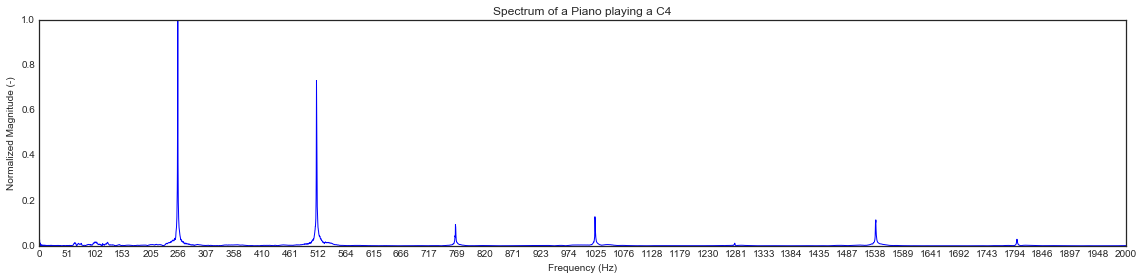

In [12]:
x_pn, x_pn_fs = librosa.load('../data/Tone_C4_Piano.wav')
x_pn_fft = fft.fft(x_pn)
n_fft_pn = x_pn_fft.shape[0]
K_pn = int(1 + n_fft_pn // 2)
f_coeff_pn = np.fft.fftfreq(n_fft_pn, d=1/x_pn_fs)
x_pn_fft_pos = x_pn_fft[:K_pn]

f_cutoff = 2000

plt.figure(figsize=(16, 4))
plt.plot(np.abs(x_pn_fft_pos) / np.max(np.abs(x_pn_fft_pos)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Magnitude (-)')
plt.title('Spectrum of a Piano playing a C4')
freqs = np.linspace(0, f_cutoff, 40)
x_locs = [np.argmin(np.abs(f_coeff - cur_freq)) for cur_freq in freqs]
plt.xticks(x_locs, f_coeff[x_locs].astype(int))
plt.xlim(0, np.argmin(np.abs(f_coeff - f_cutoff)))
plt.tight_layout()
plt.show()